#  <font color='blue' > <center>Google Play Store Analysis<center> </font>

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://cdn.arstechnica.net/wp-content/uploads/2019/01/Google-Play-card-800x478.jpg")

##  <font color='blue' > <center> Some words about the data<center> </font>
### The data set has been scraped from the Google Play Store and it is available on kaggle.
### https://www.kaggle.com/lava18/google-play-store-apps    
### This data set  considered to be rare because there are not counterpart  data sets available on the internet 
### about the Google Play Store. The Google Play store uses sofisticated modern methods and that makes the 
### web scraping to be more challenging.
### The Google Play Store Data has a high potential contribution  for the business prosperity.
### Insights coming after exploring the data can Increase financial gain,
### so if you want to make money use the power of the data!
    
## <font color='blue' > <center> My work Analysis will include:<center> </font>
###    *Description of the data
###    *The missing values analysis: making decisions about imputation or about deleting the feature.
###    *Transformation of the features into convinient types to work with them and Cleaning the data.
###    *Linear regression Data Analysis 


##   <font color='red' > <center> So let the games begin! :)  <center> </font>




In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import mean_squared_error
from pandas.tools.plotting import scatter_matrix
%matplotlib inline
pd.set_option('notebook_repr_html', True)
data = pd.read_csv("C:/Users/miri_b/Desktop/data1/googleplaystore.csv")
data


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up



##  <font color='blue' > <center> Description of the data<center> </font>

In [3]:
data.shape

(10841, 13)

### Our data consists of 13 features and 10841 rows.
### Each app (row) has values for catergory, rating, size, and more.

## The features in the data:
### *App -Application name
### *Category-Category the app belongs to
### *RatingOverall- user rating of the app (as when scraped)
### *Reviews-Number of user reviews for the app (as when scraped)
### *Size-Size of the app (as when scraped)
### *Installs-Number of user downloads/installs for the app (as when scraped)
### *Type-Paid or Free
### *Price-Price of the app (as when scraped)
### *Content- RatingAge group the app is targeted at - Children / Mature 21+ / Adult
### *Genres-An app can belong to multiple genres (apart from its main category). For eg, a musical family game  ### will belong to Music, Game, Family genres.
### *Last UpdatedDate -when the app was last updated on Play Store (as when scraped)
### *Current- VerCurrent version of the app available on Play Store (as when scraped)
### *Android- VerMin required Android version (as when scraped)













##  Now we will see the information about the data:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


##  <font color='blue' > <center>  The missing values analysis:<center> </font>
## <font color='blue' > <center>  making decisions about imputation or about deleting the feature.  <center> </font>
    

In [5]:
dfmis=data.isnull().sum().sort_values(ascending=False)
dfmis

Rating            1474
Current Ver          8
Android Ver          3
Content Rating       1
Type                 1
Last Updated         0
Genres               0
Price                0
Installs             0
Size                 0
Reviews              0
Category             0
App                  0
dtype: int64

## Missing values in percent
### As we can see the rating has the highest percent of missing values,
### But we would not drop this feature because 13.5 percent of missing values 
### is unsignificant percent of missing values. 
### *Note: Rule of thumb: The significant percent of the missing values shold be upper than  20%.


In [6]:
per=(dfmis/10841)*100
per

Rating            13.596532
Current Ver        0.073794
Android Ver        0.027673
Content Rating     0.009224
Type               0.009224
Last Updated       0.000000
Genres             0.000000
Price              0.000000
Installs           0.000000
Size               0.000000
Reviews            0.000000
Category           0.000000
App                0.000000
dtype: float64

### The feature Rating I will impute by the average of the feature.
### The feature Content Rating has only 1 missing value so I will drop this row for my analysis.
### The feature Type has only 1 missing value so I will drop this row for my analysis. 
### I will not use the features Current Ver and Android Ver for my analysis so I would not impute them.


In [7]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [8]:
np.where(data['Content Rating'].isnull())[0]

array([10472], dtype=int64)

In [9]:
data.iloc[[10472]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


### It seems like the row number 10472 moved one cell to the left, because the value  1.9 for category is unlogical and it looks like the 'Life Made WI-Fi Touchscreen Photo Frame' is the category of the app. We do not have the name of the app and the whole row is with unlogical values, From that reason I will drop This row from the data.

In [10]:
data=data.drop(data.index[10472])

In [11]:
data.shape

(10840, 13)

In [12]:
np.where(data['Type'].isnull())[0]

array([9148], dtype=int64)

In [13]:
data=data.drop(data.index[9148])

In [14]:
data.shape

(10839, 13)

##  <font color='blue' > <center> Transformation of the features into convinient types to work with them and Cleaning the data<center> </font>

### We will clean the data from the missing values,numerical string values or other unlogical values
### and in some cases we will impute the data by the average.

###  After we saw the types of the features we have,
### according to that we can deside how we will handle with the feature type.


### As we could see above:
### * The features App,Category,Genres,Content Rating  won't be changed and they stay as object.
### * Rating stays as float.
### * Reviews will be changed into integer type.
### * The size feature has cells with:"Varies with device",I think it would be better to transform it into 'NAN'.
###    and the 'K' size I will transform into Megabytes so the size of the apps will be measured in Megabytes.
### * The Installs feature I will transform into categorial feature :The categories are from 1 to 19 and it means: the ###   number of installations increases as the number of category increases .
### * Price will be changed into float type.
### * The Last Updated feature I will transform into timedate format.
### * The Current Ver stayes the same but the cells with 'Varies with device' I will transform into 'NAN'.
### * The Android Ver stayes the same but the cells with 'Varies with device' I will transform into 'NAN'.

In [15]:
data['App'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [16]:
App=data['App']

In [17]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [18]:
Category=data['Category']

In [19]:
data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

### Here I made imputation of the feature Rating by the mean.

In [20]:
data['Rating'].mean()

4.191757420456978

In [21]:
data.loc[data['Rating'].isnull(),'Rating'] = 4.19

In [22]:
data['Rating'].unique()

array([4.1 , 3.9 , 4.7 , 4.5 , 4.3 , 4.4 , 3.8 , 4.2 , 4.6 , 3.2 , 4.  ,
       4.19, 4.8 , 4.9 , 3.6 , 3.7 , 3.3 , 3.4 , 3.5 , 3.1 , 5.  , 2.6 ,
       3.  , 1.9 , 2.5 , 2.8 , 2.7 , 1.  , 2.9 , 2.3 , 2.2 , 1.7 , 2.  ,
       1.8 , 2.4 , 1.6 , 2.1 , 1.4 , 1.5 , 1.2 ])

In [23]:
Rating=data['Rating']


In [24]:
Reviews=data['Reviews'].astype(int)

### In the feature size I will transform the 'Varies with device' into 'NAN'. 

In [25]:
data.loc[data['Size']=='Varies with device','Size'] = 'NAN'
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'NAN', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M', '8.9M', '3.9M',
       '2.9M', '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M',
       '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M', '7.1M', '3.7M',
       '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M', '4.9M', '9.5M',
       '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M',
       '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M', '23k', '6.5M',
       '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M', '8.3M', '4.3M',
       '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M', '5.1M', '61M',
       '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M', '6.2M', '18k',
     

### Now I will transform the whole size feature into Mb. 

In [26]:
data['Size']=data['Size'].apply(lambda l: str(l).replace('M', ''))


In [27]:
data['Size'] = data['Size'].apply(lambda l: float(str(l).replace('k', '')) / 1000 if 'k' in str(l) else l)

In [28]:
data['Size'].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '2.7', '5.5', '17', '39', '31', '4.2',
       '7.0', '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24', 'NAN',
       '9.4', '15', '10', '1.2', '26', '8.0', '7.9', '56', '57', '35',
       '54', 0.201, '3.6', '5.7', '8.6', '2.4', '27', '2.5', '16', '3.4',
       '8.9', '3.9', '2.9', '38', '32', '5.4', '18', '1.1', '2.2', '4.5',
       '9.8', '52', '9.0', '6.7', '30', '2.6', '7.1', '3.7', '22', '7.4',
       '6.4', '3.2', '8.2', '9.9', '4.9', '9.5', '5.0', '5.9', '13', '73',
       '6.8', '3.5', '4.0', '2.3', '7.2', '2.1', '42', '7.3', '9.1', '55',
       0.023, '6.5', '1.5', '7.5', '51', '41', '48', '8.5', '46', '8.3',
       '4.3', '4.7', '3.3', '40', '7.8', '8.8', '6.6', '5.1', '61', '66',
       0.079, '8.4', 0.118, '44', 0.695, '1.6', '6.2', 0.018, '53', '1.4',
       '3.0', '5.8', '3.8', '9.6', '45', '63', '49', '77', '4.4', '4.8',
       '70', '6.9', '9.3', '10.0', '8.1', '36',

In [29]:
Size=data['Size'].astype(float)

In [30]:
sorted(data['Installs'].unique())

['0+',
 '1+',
 '1,000+',
 '1,000,000+',
 '1,000,000,000+',
 '10+',
 '10,000+',
 '10,000,000+',
 '100+',
 '100,000+',
 '100,000,000+',
 '5+',
 '5,000+',
 '5,000,000+',
 '50+',
 '50,000+',
 '50,000,000+',
 '500+',
 '500,000+',
 '500,000,000+']

### The Installs feature describes the Number of user downloads/installs for the app the 'Free' is not a suitable value,
### so it will be transformed into 'NAN'.
### The categories are from 1 to 19 and it means: the number of installations increases as the number of category increases.

In [31]:
data['Installs'].replace({'0':0,'0+':1,'1+':2,'1,000+':8,'1,000,000+':13,'1,000,000,000+':19,'10+':4,'10,000+':9,'10,000,000+':15,'100+':6,
 '100,000+':11,'100,000,000+':17,'5+':3,'5,000+':8,'5,000,000+':14,'50+':5,'50,000+':10,'50,000,000+':16,'500+':7,'500,000+':12,
 '500,000,000+':18,'Free':'NAN'}, inplace=True)


In [32]:
data['Installs'].unique()

array([ 9, 12, 14, 16, 11, 10, 13, 15,  8, 17, 19, 18,  5,  6,  7,  4,  2,
        3,  1], dtype=int64)

In [33]:
Installs=data['Installs']


### data['Price'].astype(float)
### ValueError: could not convert string to float: '$4.99'

### In the feature Price I Inoticed the  $  char in each cell and the string 'Everyone' , 
### I will delete the char and change the string into 'NAN'.

In [34]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [35]:
data['Price']=data['Price'].apply(lambda l: str(l).replace('$', ''))
data['Price']=data['Price'].apply(lambda l: str(l).replace('Everyone', 'NAN'))

In [36]:
data['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [37]:
Price=data['Price'].astype(float)
Price

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
10811    0.0
10812    0.0
10813    0.0
10814    0.0
10815    0.0
10816    0.0
10817    0.0
10818    0.0
10819    0.0
10820    0.0
10821    0.0
10822    0.0
10823    0.0
10824    0.0
10825    0.0
10826    0.0
10827    0.0
10828    0.0
10829    0.0
10830    0.0
10831    0.0
10832    0.0
10833    0.0
10834    0.0
10835    0.0
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10839, dtype: float64

In [38]:
data['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [39]:
data['last_updated_new']=pd.to_datetime(data['Last Updated'],errors='coerce')


In [40]:
max_date_updated=data['last_updated_new'].max()
max_date_updated

Timestamp('2018-08-08 00:00:00')

### Suppose that  each app could be  updated until the maximal date of the whole dates that whole the apps
### has been updated. The last date for updating the apps was: 08-08-2018

In [41]:
data['last_updated_timepassed']=(max_date_updated-data['last_updated_new']).dt.days

In [42]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,last_updated_new,last_updated_timepassed
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19,9,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018-01-07,213
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14,12,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018-01-15,205
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7,14,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018-08-01,7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25,16,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018-06-08,61
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8,11,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018-06-20,49
5,Paper flowers instructions,ART_AND_DESIGN,4.40,167,5.6,10,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,2017-03-26,500
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.80,178,19,10,Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,2018-04-26,104
7,Infinite Painter,ART_AND_DESIGN,4.10,36815,29,13,Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,2018-06-14,55
8,Garden Coloring Book,ART_AND_DESIGN,4.40,13791,33,13,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,2017-09-20,322
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.70,121,3.1,9,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,2018-07-03,36


In [43]:
last_updated_timepassed=data['last_updated_timepassed']

In [44]:
data['last_updated_timepassed'].describe()

count    10839.000000
mean       259.740290
std        394.623601
min          0.000000
25%         19.000000
50%         76.000000
75%        322.000000
max       3001.000000
Name: last_updated_timepassed, dtype: float64

In [45]:
Content_Rating=data['Content Rating'] 

In [46]:
Genres=data['Genres']

#  <font color='blue' > <center> Linear regression Analysis <center> </font>

### Linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression

# <font color='blue' > <center> Predict the Rating of the apps <center> </font>

### We will predict the rating of the apps with the linear Regression method.
### Our target feature (dependent) will be the Rating and
### the independent features that will help us predicting the rating in the linear regression model will be: 
### *categorial feature:Type
### *continuous features:Reviews,Price,Size,last_updated_time_passed

In [47]:
dnewcat=pd.concat([Rating,data['Type']], axis=1)

In [48]:
dnewcon=pd.concat([Rating,Reviews,Price,Size,last_updated_timepassed], axis=1)

### <font color='green' >  Categorical features  </font>

### In regression analysis, the dependent variables may be influenced not only by quantitative variables (income, number of Reviews, prices, etc.), but also by qualitative variables as in our case named categorial feature like   type (free or paid). When we want to build the regression model with qualitative feature, there is a need to define Dummy  variable.
### A dummy independent variable (also called a dummy explanatory variable) which for some observation has a value of 0 will cause that variable's coefficient to have no role in influencing the dependent variable, while when the dummy takes on a value 1 its coefficient acts to alter the intercept. 



In [49]:
dnewcat.head(5)

,Rating,Type
0,4.1,Free
1,3.9,Free
2,4.7,Free
3,4.5,Free
4,4.3,Free


In [50]:
all_data_dummies = pd.get_dummies(dnewcat, columns=['Type'])
all_data_dummies.head()


,Rating,Type_Free,Type_Paid
0,4.1,1,0
1,3.9,1,0
2,4.7,1,0
3,4.5,1,0
4,4.3,1,0


### Fit the model

In [51]:


X = all_data_dummies.drop(['Rating'], axis=1, inplace=False)
y = all_data_dummies['Rating']

all_lm = LinearRegression().fit(X, y)

## Inspect the model

In [52]:
all_lm.intercept_

4.219332181367666

In [53]:
all_lm.coef_

array([-0.03263032,  0.03263032])

In [54]:
list(zip(X.columns, all_lm.coef_))

[('Type_Free', -0.03263031863233338), ('Type_Paid', 0.03263031863233339)]

<br>
<font size=3>

This means that the regression function is:



$$Rating=4.2193-0.0326*Type Free+0.0326*Type Paid$$ 

## Apply the model

In [55]:
all_data_dummies['Rating prediction'] = all_lm.predict(X)


In [56]:
all_data_dummies.head()

,Rating,Type_Free,Type_Paid,Rating prediction
0,4.1,1,0,4.186702
1,3.9,1,0,4.186702
2,4.7,1,0,4.186702
3,4.5,1,0,4.186702
4,4.3,1,0,4.186702


## Visualize the model

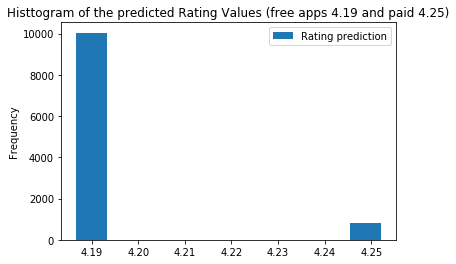

In [57]:
all_data_dummies.plot('Rating', 'Rating prediction',
                     kind='hist', 
                     title='Histtogram of the predicted Rating Values (free apps 4.19 and paid 4.25)')


In [58]:
all_data_dummies.head()

,Rating,Type_Free,Type_Paid,Rating prediction
0,4.1,1,0,4.186702
1,3.9,1,0,4.186702
2,4.7,1,0,4.186702
3,4.5,1,0,4.186702
4,4.3,1,0,4.186702


In [59]:
all_data_dummies['Rating prediction'].unique()

array([4.18670186, 4.2519625 ])

## As we can see the rating  prediction for the free app was 4.18670186 and for the paid app it was 4.2519625. 

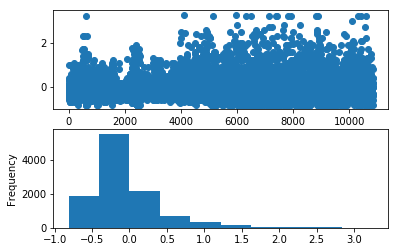

In [60]:
residuals = all_data_dummies['Rating prediction']  - all_data_dummies['Rating']
plt.figure()
plt.subplot(211)
plt.plot(residuals, linestyle=' ', marker='o')
plt.subplot(212)
residuals.plot(kind='hist', bins=10)

In [61]:
all_rmse = np.sqrt(MSE(all_data_dummies['Rating'], 
                       all_data_dummies['Rating prediction']))
print( "RMSE = {:.2f}".format(all_rmse))

RMSE = 0.48


## <font color='green' >  Simple Linear Regression with one independent feature </font>

### How we will choose our independent feature for the Simple liniar regression?
### We will check the correlation of the features and will take the 
### higher correlated feature with our target feature Rating.

In [62]:
alld=all_data_dummies.drop(['Rating prediction'], axis=1, inplace=False)

In [63]:
df = pd.merge(dnewcon, alld, on='Rating')

In [64]:
df.head()

,Rating,Reviews,Price,Size,last_updated_timepassed,Type_Free,Type_Paid
0,4.1,159,0.0,19.0,213,1,0
1,4.1,159,0.0,19.0,213,1,0
2,4.1,159,0.0,19.0,213,1,0
3,4.1,159,0.0,19.0,213,1,0
4,4.1,159,0.0,19.0,213,1,0


In [65]:
df.corr()

,Rating,Reviews,Price,Size,last_updated_timepassed,Type_Free,Type_Paid
Rating,1.000000,0.085011,-0.025330,0.103920,-0.134973,-0.027794,0.027794
Reviews,0.085011,1.000000,-0.010702,0.259544,-0.090570,0.004088,-0.004088
Price,-0.025330,-0.010702,1.000000,-0.022270,0.014732,-0.000543,0.000543
Size,0.103920,0.259544,-0.022270,1.000000,-0.220261,0.013787,-0.013787
last_updated_timepassed,-0.134973,-0.090570,0.014732,-0.220261,1.000000,-0.000934,0.000934
Type_Free,-0.027794,0.004088,-0.000543,0.013787,-0.000934,1.000000,-1.000000
Type_Paid,0.027794,-0.004088,0.000543,-0.013787,0.000934,-1.000000,1.000000


#### AS we can see Rating feature has the highest correlation with the feature size (	0.103920).

## <font color='green' >  Simple linear regression with the feature size of the app and the target variable rating:</font>

In [66]:
dfsimple=df.drop(['Reviews','Price','last_updated_timepassed','Type_Free','Type_Paid'], axis=1, inplace=False)
dfsimple.head()



,Rating,Size
0,4.1,19.0
1,4.1,19.0
2,4.1,19.0
3,4.1,19.0
4,4.1,19.0


### Build the model

In [67]:
from sklearn.model_selection import train_test_split
dfs_train, dfs_test = train_test_split(dfsimple, test_size=0.3, random_state=42)
X_train = dfs_train['Size'].values.reshape(-1,1)
y_train = dfs_train['Rating'].values


### <font color='red' >  model.fit(X_train,y_train) </font>
### <font color='red' > ValueError: Input contains NaN, infinity or a value too large for dtype('float64').</font>
### <font color='red' > It seems to be that the variable size has NAN values so we have to impute him. </font>
 

In [68]:
dfsimple['Size'].isnull().values.any()

True

In [69]:
dfsimple['Rating'].isnull().values.any()

False

In [70]:
dfsimple['Size'].mean()

21.716310082383476

In [71]:
dfsimple.loc[dfsimple['Size'].isnull(),'Size'] = 21.7163

In [72]:
dfsimple['Rating'].isnull().values.any()

False

In [79]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
dfs_train, dfs_test = train_test_split(dfsimple, test_size=0.3, random_state=42)
X_train = dfs_train['Size'].values.reshape(-1,1)
y_train = dfs_train['Rating'].values


In [80]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [81]:
model.coef_

array([0.00106457])

In [82]:
model.intercept_

4.272363886298499

<br>
<font size=3>

This means that the regression function is:



$$Rating=4.2723+0.0010633*Size$$ 

C:\Users\miri_b\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


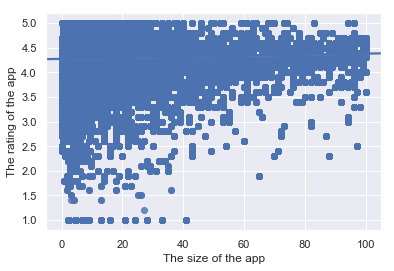

In [80]:
sns.set(color_codes=True)
sns.regplot(X_train, y_train)
plt.xlabel('The size of the app')
plt.ylabel('The rating of the app')
plt.show()

### Predict

In [84]:
X_test = dfs_test['Size'].values.reshape(-1,1)
y_test = dfs_test['Rating'].values

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


all_rmse = np.sqrt(mean_squared_error(y_train_pred, 
                       y_train))
print("RMSE = {:.10f}".format(all_rmse))


all_rmse = np.sqrt(mean_squared_error(y_test_pred, 
                       y_test))
print("RMSE = {:.10f}".format(all_rmse))

RMSE = 0.2278240199
RMSE = 0.2275009182


### Evaluate

In [85]:
mean_squared_error(y_train, y_train_pred)

0.05190378402754197

In [86]:
mean_squared_error(y_test, y_test_pred)

0.05175666780010108

### Imputation of the size feature by the mean in the df dataframe.

In [87]:
dfmis=df.isnull().sum().sort_values(ascending=False)
dfmis

Size                       1459711
Type_Paid                        0
Type_Free                        0
last_updated_timepassed          0
Price                            0
Reviews                          0
Rating                           0
dtype: int64

In [88]:
df['Size'].mean()

21.716310082383476

In [89]:
df.loc[df['Size'].isnull(),'Size'] = 21.7163


In [90]:
df.isnull().sum().sort_values(ascending=False)

Type_Paid                  0
Type_Free                  0
last_updated_timepassed    0
Size                       0
Price                      0
Reviews                    0
Rating                     0
dtype: int64

## Multiple Linear Regression
### Split data to Train, Test 

In [91]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

### Target Feature distribution  need to be similar in test and train group. Now we will check the distribution of our target feature Rating.

In [102]:
print(len(df), len(df_test), len(df_train))

8833291 2649988 6183303


Text(0, 0.5, 'Frequency')

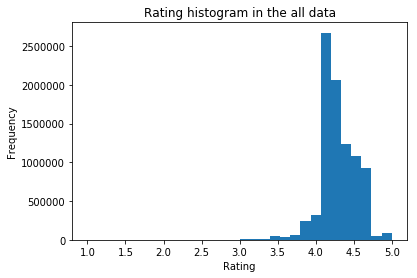

In [93]:
plt.hist(df.Rating,bins=30)
plt.title('Rating histogram in the all data')
plt.xlabel('Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

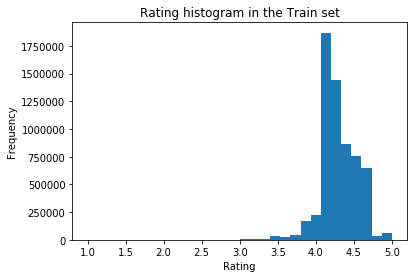

In [94]:
plt.hist(df_train.Rating,bins=30)
plt.title('Rating histogram in the Train set')
plt.xlabel('Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

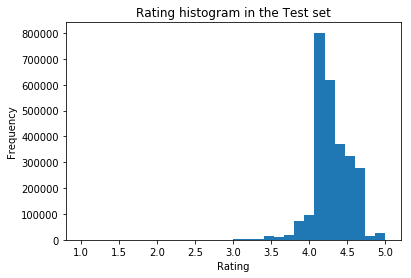

In [95]:
plt.hist(df_test.Rating,bins=30)
plt.title('Rating histogram in the Test set')
plt.xlabel('Rating')
plt.ylabel('Frequency')

### The distribution in the train,test seems to be similar. 

In [96]:
d=df.describe()
d.round(2)

,Rating,Reviews,Price,Size,last_updated_timepassed,Type_Free,Type_Paid
count,8833291.00,8833291.00,8833291.00,8833291.00,8833291.00,8833291.00,8833291.00
mean,4.30,512530.83,0.94,21.72,246.26,0.92,0.08
std,0.23,3087443.54,14.39,20.79,380.74,0.26,0.26
min,1.00,0.00,0.00,0.01,0.00,0.00,0.00
25%,4.19,13.00,0.00,6.00,16.00,1.00,0.00
50%,4.30,2178.00,0.00,19.00,74.00,1.00,0.00
75%,4.40,71468.00,0.00,26.00,302.00,1.00,0.00
max,5.00,78158306.00,400.00,100.00,3001.00,1.00,1.00


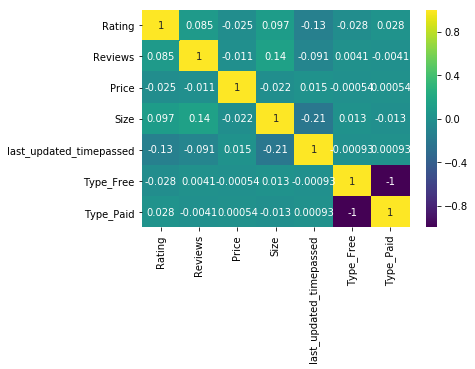

In [97]:
sns.heatmap(df.corr(), annot=True,cmap='viridis')
plt.show()

In [98]:
dd=df_test.describe()
dd.round(2)

,Rating,Reviews,Price,Size,last_updated_timepassed,Type_Free,Type_Paid
count,2649988.00,2649988.00,2649988.00,2649988.00,2649988.00,2649988.00,2649988.00
mean,4.30,511709.92,0.93,21.70,246.30,0.92,0.08
std,0.23,3091307.56,14.35,20.77,380.83,0.26,0.26
min,1.00,0.00,0.00,0.01,0.00,0.00,0.00
25%,4.19,13.00,0.00,6.10,16.00,1.00,0.00
50%,4.30,2180.00,0.00,19.00,74.00,1.00,0.00
75%,4.40,71468.00,0.00,26.00,302.00,1.00,0.00
max,5.00,78158306.00,400.00,100.00,3001.00,1.00,1.00


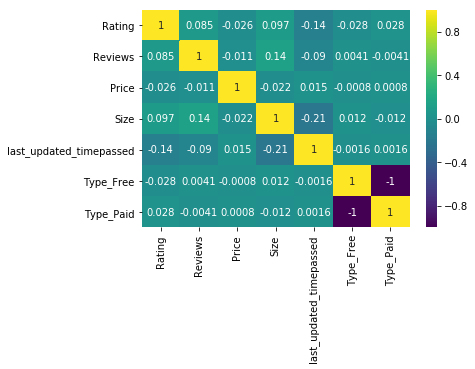

In [99]:
sns.heatmap(df_test.corr(), annot=True,cmap='viridis')
plt.show()

### Build the model

In [128]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)
X_train = df_train.drop(['Rating'], axis=1, inplace=False).values
y_train = df_train['Rating'].values

In [129]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [130]:
model.coef_

array([ 4.85512154e-09, -3.40486280e-04,  6.93020707e-04, -6.92887028e-05,
       -1.24021658e-02,  1.24021658e-02])

In [131]:
model.intercept_

4.305844269953888

In [140]:
df_train.head(2)

,Rating,Reviews,Price,Size,last_updated_timepassed,Type_Free,Type_Paid
5183478,4.2,26307,0.0,21.7163,13,1,0
5275736,4.2,980,0.0,21.7163,4,1,0


<br>
<font size=3>

This means that the regression function is:
$$Rating=4.3058+0.000000004855*Reviews-0.0003404*Price+0.000693*Size
-0.00006928*last Updated Timepassed-0.012402*TypeFree+0.012402*TypePaid$$

### Predict

In [142]:
X_test = df_test.drop(['Rating'], axis=1, inplace=False).values
y_test = df_test['Rating'].values

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


all_rmse_train = np.sqrt(mean_squared_error(y_train_pred, 
                       y_train))
print('all_rmse_train',all_rmse_train)

all_rmse_test = np.sqrt(mean_squared_error(y_test_pred, 
                       y_test))
print('all_rmse_test',all_rmse_test)

all_rmse_train 0.22561020147355104
all_rmse_test 0.22526247877296454


### Evaluate

In [143]:
mse_train=mean_squared_error(y_train, y_train_pred)
print('MSE TRAIN',mse_train)

MSE TRAIN 0.050899963008936296


In [145]:
mse_test=mean_squared_error(y_test, y_test_pred)
print('MSE TEST',mse_test)

MSE TEST 0.0507431843429403


(array([5.602400e+04, 1.129543e+06, 1.384117e+06, 6.606500e+04,
        1.035000e+04, 3.123000e+03, 5.060000e+02, 1.510000e+02,
        2.600000e+01, 8.300000e+01]),
 array([-8.32730520e-01, -4.15602223e-01,  1.52607323e-03,  4.18654370e-01,
         8.35782667e-01,  1.25291096e+00,  1.67003926e+00,  2.08716756e+00,
         2.50429585e+00,  2.92142415e+00,  3.33855245e+00]),
 <a list of 10 Patch objects>)

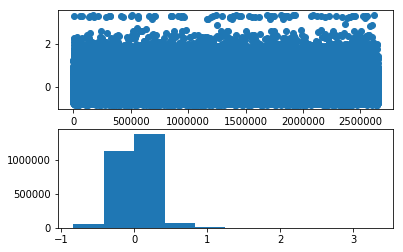

In [146]:
residuals = y_test_pred  - y_test
plt.figure()
plt.subplot(211)
plt.plot(residuals, linestyle=' ', marker='o')
plt.subplot(212)
plt.hist(residuals, bins=10)

#  <font color='red' > <center> Conclusion of this Analysis<center> </font>

## *From the regression analysis of the rating with the type of the app we have seen that the rating of the paid app is higher than the rating of the free app and it means people are ready to pay for a good content.
## *By building the multiple regression model the mean square error of 
## the train was 0.050899963008936296 
## and it is higher than the test mse
## the test mse 0.0507431843429403
## The mse in the test set a little bit lower.
## I can conclude that there is no  overfitting here because if there was than our model would be fitted well on the train set but worse on the test set and it means that the mse on the train set can be low and on the test set is can be high when the overfitting happens. It is possible to have a lower test error in practice. This usually happens,  when a method generalizes well, this  behavior  can be observed with a linear regression. In addition, a training set is large, but a test set is small as in our case the test set is about 2 milion obs and the train set is about 6 milion obs.

In [333]:
df.shape

(8833291, 7)

In [336]:
print(round((8833291*70)/100))

6183304


In [337]:
print(8833291-6183304)

2649987


#  <font color='red' > <center> :)  Thank you! <center> </font>

In [101]:
Image(url= "https://data.whicdn.com/images/305507685/original.gif?t=1516237962")
